In [1]:
import math 
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")

C:\Users\diead\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' 

In [2]:
AAPL = web.DataReader("AAPL",data_source='yahoo', start="2012-01-01",end="2021-01-01")

In [3]:
AAPL.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064


In [4]:

AAPL.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

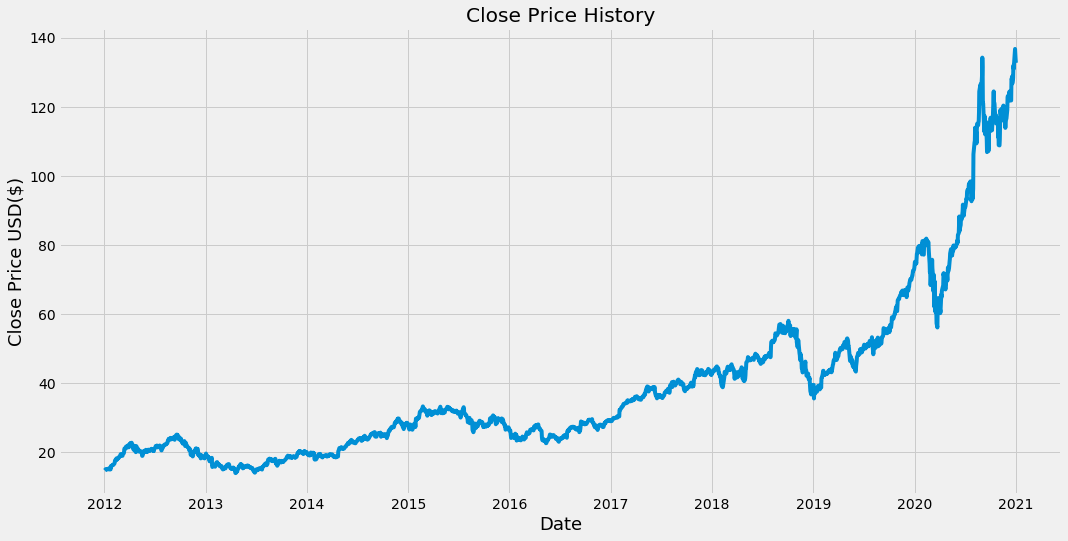

In [5]:
# Visualize the data

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(AAPL['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD($)",fontsize=18)
plt.show()

In [6]:

#Create a new dataframe with 'Close cloumn'

data=AAPL.filter(['Close'])

#Convert the dataframe to a numbpy array

dataset=data.values

#Get the number of rows to train the model on 

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1812

In [7]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.00602306],
       [0.00666611],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [8]:
#Create the training data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

#split the data 

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
     print(x_train)
     print(y_train)

[array([0.00602306, 0.00666611, 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851958, 0.00994242,
       0.01122559, 0.01082987, 0.00866215, 0.01073094, 0.00869416,
       0.0163321 , 0.01574143, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117443, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420113,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.04407018, 0.04499548, 0.04698279, 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.06268348, 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]
[array([0.00602306, 0.00666611, 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851958, 0.00994242,
       0.01122559, 0.01082987, 0.008

In [9]:
# Converting x_train and y_train to numpy arrays

x_train,y_train= np.array(x_train), np.array(y_train)

In [10]:
# Reshape the x_train set
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [11]:
# Build the LSTM model 

model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model

model.compile(optimizer='adam', loss="mean_squared_error")

In [13]:
# Train the model 

model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1752/1752 [==============================] - 98s 56ms/step - loss: 2.5354e-04


In [14]:
# Creating the testing data set

# Creating a new array containing scaled values from index 1617 - 2096

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:

#Convert the data to a numpy array
x_test =np.array(x_test)

In [16]:

#Reshape x_test
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(453, 60, 1)

In [17]:
# Get the models predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))

rmse

5.106844389905588

C:\Users\diead\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


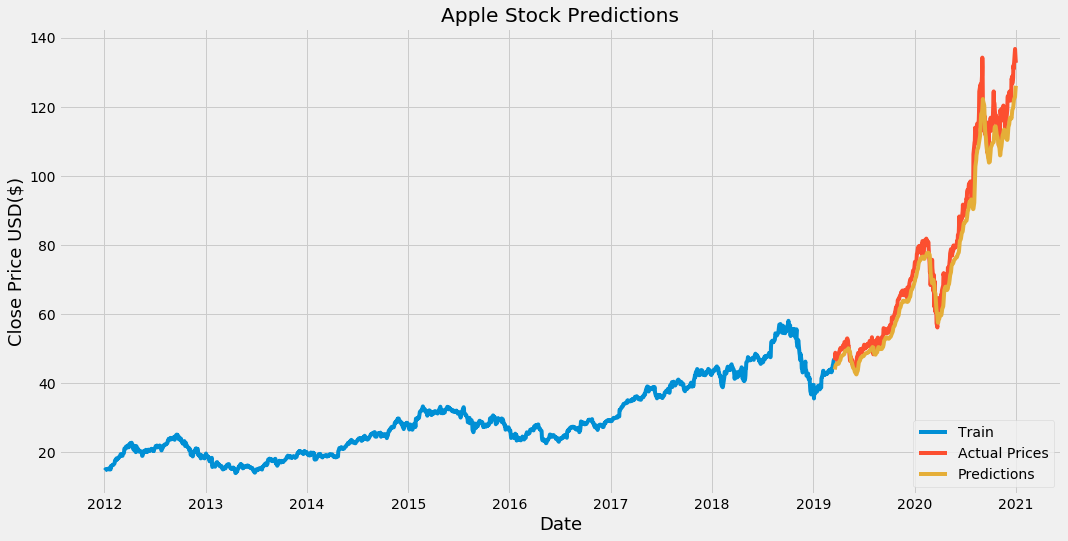

In [19]:
# Plotting the data

train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data

plt.figure(figsize =(16,8))
plt.title('Apple Stock Predictions')
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Actual Prices','Predictions'],loc='lower right')
plt.show()